In [1]:
# import libraries 
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords


In [2]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model

In [3]:
# import data 
df = pd.read_csv('spotify_songs.csv')

# check data
df.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [4]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000,18454.000000
mean,42.438821,0.644066,0.692289,5.342094,-6.769159,0.580525,0.106192,0.175348,0.051216,0.189593,0.520598,120.812167,230319.306763
std,24.616740,0.150071,0.180635,3.613121,2.920757,0.493487,0.102291,0.217795,0.168263,0.153751,0.228716,27.586424,57255.086685
min,0.000000,0.098500,0.016700,0.000000,-34.283000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,37.114000,31893.000000
25%,24.000000,0.546000,0.573000,2.000000,-8.249000,0.000000,0.039700,0.016100,0.000000,0.092700,0.345000,98.856000,193230.250000
50%,48.000000,0.660000,0.715000,6.000000,-6.227000,1.000000,0.060300,0.081900,0.000009,0.128000,0.522000,120.045000,221340.000000
75%,62.000000,0.755000,0.835000,9.000000,-4.719000,1.000000,0.130000,0.254000,0.001720,0.246000,0.700000,135.984000,258078.250000
max,100.000000,0.979000,1.000000,11.000000,1.275000,1.000000,0.918000,0.992000,0.987000,0.996000,0.991000,214.047000,517810.000000


In [5]:
df.shape, df.columns, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18454 entries, 0 to 18453
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  18454 non-null  object 
 1   track_name                18454 non-null  object 
 2   track_artist              18454 non-null  object 
 3   lyrics                    18194 non-null  object 
 4   track_popularity          18454 non-null  int64  
 5   track_album_id            18454 non-null  object 
 6   track_album_name          18454 non-null  object 
 7   track_album_release_date  18454 non-null  object 
 8   playlist_name             18454 non-null  object 
 9   playlist_id               18454 non-null  object 
 10  playlist_genre            18454 non-null  object 
 11  playlist_subgenre         18454 non-null  object 
 12  danceability              18454 non-null  float64
 13  energy                    18454 non-null  float64
 14  key   

((18454, 25),
 Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
        'track_album_id', 'track_album_name', 'track_album_release_date',
        'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
        'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_ms', 'language'],
       dtype='object'),
 None)

In [6]:
# subset data for english lyrics only 
df = df[df['language'] == 'en']

In [7]:
top100 = df.nlargest(100, "track_popularity")
top100.sample(5)

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
14978,6Gg1gjgKi2AK4e0qzsR7sd,Bandit (with YoungBoy Never Broke Again),Juice WRLD,"It's funny, the shit I put on this song ain't ...",92,3t6Z2qoBVCS4NHNI25XECH,Bandit (with YoungBoy Never Broke Again),2019-10-04,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,...,-5.884,0,0.3430,0.06870,0.000000,0.132,0.425,180.051,189323,en
7808,3ee8Jmje8o58CHK66QrVC2,SAD!,XXXTENTACION,Yeah Who am I? Someone that's afraid to let go...,87,2Ti79nwTsont5ZHfdxIzAm,?,2018-03-16,Trap strefa,37i9dQZF1DWY3UKS6jvnxr,...,-4.880,1,0.1450,0.25800,0.003720,0.123,0.473,75.023,166606,en
3074,1e9oZCCiX42nJl0AcqriVo,Watermelon Sugar,Harry Styles,Tastes like strawberries on a summer evenin' A...,90,659e2eKbsMH0vYCs5qgFmy,Watermelon Sugar,2019-11-17,"post-teen alternative, indie, pop (large variety)",1y42gwI5cuwjBslPyQNfqb,...,-4.209,1,0.0465,0.12200,0.000000,0.335,0.557,95.390,174000,en
5667,2gwkD6igEhQbDQegRCcdoB,Suge,DaBaby,"Pooh, you a fool for this one HaOh Lord, Jetso...",87,0O1PJ0t69iTO5yWrIeIga0,Baby On Baby,2019-03-01,Hip Hop Controller,37i9dQZF1DWT5MrZnPU1zD,...,-6.482,0,0.4260,0.06080,0.000000,0.127,0.844,75.445,163320,en
12097,57vxBYXtHMk6H1aD29V7PU,Heartless,The Weeknd,"Young Metro, young Metro, young Metro (Sheesh)...",93,7vRcickwa6GCfY1qKKe4lK,Heartless,2019-11-27,Todo Éxitos,2ji5tRQVfnhaX1w9FhmSzk,...,-5.831,0,0.1110,0.00632,0.000076,0.117,0.198,169.954,200080,en


In [8]:
# Preprocess text
top100['lyrics'] = top100['lyrics'].astype(str)
top100["lyrics"] = top100["lyrics"].str.lower().str.replace(r'[^\w\s]','').str.split()


C:\Users\htw10\AppData\Local\Temp\ipykernel_22308\960963507.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  top100["lyrics"] = top100["lyrics"].str.lower().str.replace(r'[^\w\s]','').str.split()


(array([ 8., 11.,  2.,  7.,  4.,  3.,  6.,  8.,  4.,  5.,  7.,  5.,  5.,
         4.,  2.,  2.,  6.,  2.,  0.,  1.,  0.,  1.,  0.,  2.,  3.,  0.,
         0.,  1.,  0.,  1.]),
 array([ 186.        ,  363.43333333,  540.86666667,  718.3       ,
         895.73333333, 1073.16666667, 1250.6       , 1428.03333333,
        1605.46666667, 1782.9       , 1960.33333333, 2137.76666667,
        2315.2       , 2492.63333333, 2670.06666667, 2847.5       ,
        3024.93333333, 3202.36666667, 3379.8       , 3557.23333333,
        3734.66666667, 3912.1       , 4089.53333333, 4266.96666667,
        4444.4       , 4621.83333333, 4799.26666667, 4976.7       ,
        5154.13333333, 5331.56666667, 5509.        ]),
 <BarContainer object of 30 artists>)

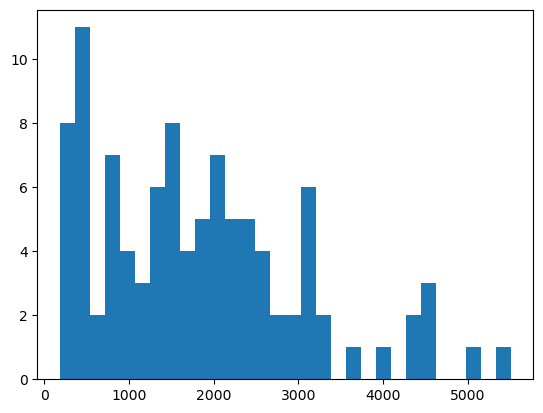

In [9]:
# word count for top 100 popularities lyrics
top100['word_count'] = np.NAN
for n in range(len(top100)):
  top100.iloc[n,-1] = len(top100.iloc[n, 3])

# histgram for top100 lyrics word count 
plt.hist(top100['word_count'], bins = 30)

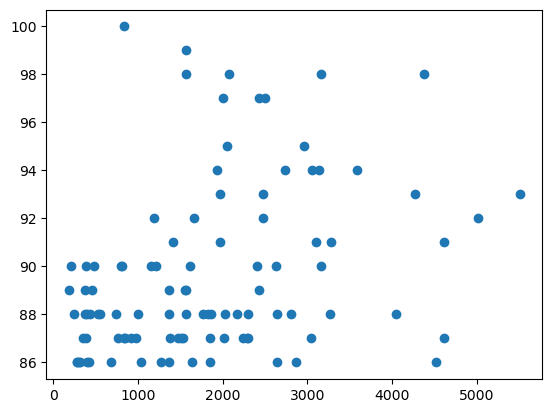

In [10]:
# is there any relationship between wordcount and popularity?
plt.scatter(x = 'word_count', y = 'track_popularity', data = top100)

<Axes: xlabel='word_count_range', ylabel='track_popularity'>

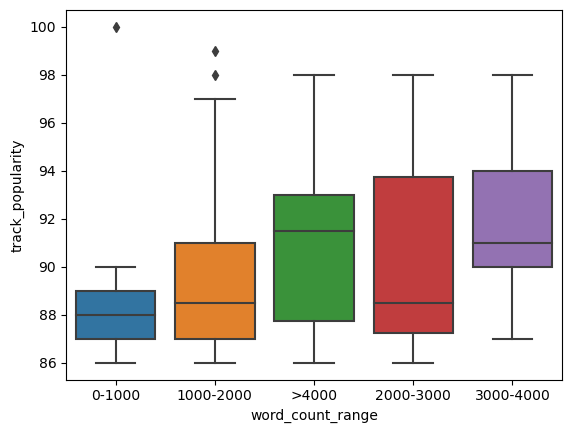

In [11]:
# label range of word count 
top100['word_count_range'] = np.NAN
for n in range(len(top100)):
    if top100.iloc[n, -2] <= 1000:
        top100.iloc[n, -1] = '0-1000'
    elif top100.iloc[n, -2] <= 2000:
        top100.iloc[n, -1] = '1000-2000'
    elif top100.iloc[n, -2] <= 3000:
        top100.iloc[n, -1] = '2000-3000'
    elif top100.iloc[n, -2] <= 4000:
        top100.iloc[n, -1] = '3000-4000'
    else:
        top100.iloc[n, -1] = '>4000'

# box plot for word count range and popularity
sns.boxplot(x = 'word_count_range', y = 'track_popularity', data = top100)

In [12]:
# create word cloud for top 100 lyrics to ovserve the most frequent words
# tokenize the lyrics 
tokenized_lyrics = []
for n in range(len(top100)):
    tokenized_lyrics.append(top100.iloc[n, 3])

# check the sample of tokenized lyrics
tokenized_lyrics[0][0:5]

['they', 'say', 'oh', 'my', 'god']

In [13]:
# clean the tokenized lyrics
# define a function to lematize and remove stop words
def clean_lyrics(text):
    text = [x for x in text if x not in stopwords.words('english')]
    text = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in text]
    text = [x for x in text if x not in string.punctuation]
    text = [x for x in text if x not in ['...']]
    text = [x for x in text if not any(c.isdigit() for c in x)]
    return text

# apply the function to tokenized lyrics
cleaned_lyrics = clean_lyrics(tokenized_lyrics)


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\htw10/nltk_data'
    - 'c:\\Users\\htw10\\anaconda3\\nltk_data'
    - 'c:\\Users\\htw10\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\htw10\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\htw10\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
# Fit tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
lyrics = top100["lyrics"].values.tolist()
tokenizer.fit_on_texts(lyrics)

# Define vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Create sequences from lyrics
sequences = tokenizer.texts_to_sequences(lyrics)
max_sequence_len = max([len(x) for x in sequences])

# Pad sequences
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding="pre")

# Create input and output sequences
sequences = tf.one_hot(sequences, depth=vocab_size)
sequences = tf.cast(sequences, tf.float32)

In [ ]:
# Train model
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(None, vocab_size)))
model.add(keras.layers.Dense(vocab_size, activation="softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam")

In [ ]:
# Train model
batch_size = 64
num_epochs = 10
steps_per_epoch = len(sequences) // batch_size
model.fit(sequences[:, :-1], sequences[:, 1:], epochs=num_epochs, batch_size=batch_size, steps_per_epoch=steps_per_epoch)